In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
path = "C:/Users/AndresFelipe/Downloads/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [3]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

# Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 700 datos.
El conjunto de datos de prueba (test) tiene 300 datos.


# Punto 2: Hacer pre-procesamiento del texto

In [5]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

In [6]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf_vect.fit(train.review_body.values);

In [7]:
X_train = tfidf_vect.transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (700, 2963)
Tamaño de X_test (prueba): (300, 2963)
Tamaño de y_train 700 y tamaño de y_test 300


# Punto 3: Entrenar el modelo

In [8]:

from sklearn.linear_model import LogisticRegression


In [9]:
# Inicializar el clasificador

logreg = LogisticRegression(class_weight='balanced')


In [10]:
# Entrenamos el  modelos

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [11]:
y_pred_logreg = logreg.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [13]:

print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")

Regresión Logística:    0.85


In [26]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):.2f}")
    print()

precision_score
Regresión Logística: 0.82

recall_score
Regresión Logística: 0.87

f1_score
Regresión Logística: 0.84



In [15]:
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()

Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.82      0.87      0.84       140
 video_games       0.88      0.83      0.86       160

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300




Text(0.5, 1.0, 'Regresión Logística')

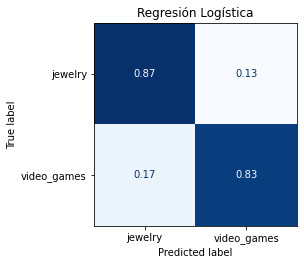

In [18]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,2,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax, normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

In [21]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{1637: 'malísimos',
 916: 'día',
 910: 'duraron',
 1580: 'llegaron',
 751: 'descoloridos',
 2680: 'tal',
 2261: 'puse',
 2473: 'roto',
 2153: 'preciosa',
 225: 'aunque',
 1191: 'fina',
 2287: 'quería',
 2390: 'regalar',
 1784: 'mujer',
 1998: 'pendientes',
 2086: 'plata',
 696: 'decanté',
 1317: 'gustan',
 1094: 'estrellas',
 963: 'encantado',
 39: 'acierto',
 935: 'elección',
 1290: 'grandes',
 336: 'cada',
 1093: 'estrella',
 305: 'brillantitos',
 302: 'brillan',
 2382: 'reflejo',
 1614: 'luz',
 2244: 'puestos',
 2270: 'quedan',
 939: 'elegantes',
 2435: 'respecto',
 439: 'cierre',
 1423: 'incorporan',
 827: 'diferentes',
 2093: 'plástico',
 2902: 'vienen',
 1706: 'metidos',
 289: 'bolsitas',
 2094: 'plásticos',
 1524: 'lado',
 440: 'cierres',
 2891: 'vez',
 738: 'dentro',
 344: 'cajita',
 1491: 'joyería',
 670: 'da',
 2756: 'toque',
 348: 'calidad',
 208: 'aspecto',
 2144: 'positivo',
 1202: 'forma',
 2682: 'tamaño',
 2675: 'sólo',
 2940: 'válidos',
 1785: 'mujeres',
 2582: 'sino',


# Punto 5: Términos más importantes de cada categoría

In [22]:
# Las palabras que contribuyen a la clase 1
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]

[('calidad', -1.91),
 ('foto', -1.8),
 ('pulsera', -1.76),
 ('bonito', -1.7),
 ('bonitos', -1.64),
 ('bonita', -1.52),
 ('plata', -1.47),
 ('pendientes', -1.06),
 ('cadena', -1.04),
 ('cierre', -1.03)]

# Punto 6: Pregunta

¿Qué interpretación y/o conclusiones saca de su modelo?

Las palabras que mas influyen en el modelo con la varible joyeria, hablan principalmente de la calidad del producto, la foto de la publicidad es la segunda palabra con mas importancia, en tercer lugar las pulseras al parecer son una palabra que se repite frecuentemente y por ultimo una palabra recurrente es la belleza del objeto con bonito, bntos y bonita.

Este modelo tiene una precision del 85% para predecir si la reseña pertenece a un video juego o si trata de joyeria.